# ⬇️ IMPORTS

In [44]:
# Data Processing
import pandas as pd

# Datetime operations
from datetime import datetime as dt
from datetime import timedelta as td

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# ⏬ & 🔍 | Data Download and EDA

## General Overview

In [77]:
PATH = r"./data/"

# Data Downloading
sales_df = pd.read_csv(PATH + "shop_sales" + ".csv")
dates_df = pd.read_csv(PATH + "shop_sales_dates" + ".csv")
price_df = pd.read_csv(PATH + "shop_sales_prices" + ".csv")

# Data preparation
dates_df["date"] = pd.to_datetime(dates_df["date"])
sales_df["item_id_code"] = sales_df["item_id"].apply(lambda item: int(item[8:]))

print( "Информация про количество данных:" )
print( f"sales_df: {sales_df.shape}" )
print( f"price_df: {price_df.shape}" )
print( f"dates_df: {dates_df.shape}" )
print()

print( "Информация про время:" )
print( f"Промежуток train данных: {dates_df.date.min()} - {dates_df.date.max()}" )
print()

print( "Информация про качественные характеристики данных:" )
print( f"Кол-во магазинов для анализа: {sales_df.store_id.nunique()}" )
print( f"Кол-во товаров для анализа: {sales_df.item_id.nunique()}" )
print( f"Количество дней для анализа: {dates_df.date.max() - dates_df.date.min() + td(days=1)}" )
print()

Информация про количество данных:
sales_df: (81855, 4)
price_df: (11141, 4)
dates_df: (1819, 14)

Информация про время:
Промежуток train данных: 2011-01-29 00:00:00 - 2016-01-21 00:00:00

Информация про качественные характеристики данных:
Кол-во магазинов для анализа: 3
Кол-во товаров для анализа: 45
Количество дней для анализа: 1819 days 00:00:00



In [91]:
sales_df.groupby(["store_id"])["item_id"].nunique()

store_id
STORE_1    15
STORE_2    15
STORE_3    15
Name: item_id_code, dtype: int64

In [94]:
sales_df["item_id_code"].unique()

array([ 85,  43,  54, 325,  90, 252, 376, 391, 524, 555, 586, 587, 681,
       714, 716,  12, 114, 357, 360, 169, 222, 358, 389, 804,  64,  65,
       339, 546, 547, 584, 727])

In [96]:
sales_df.groupby(["item_id_code"])["store_id"].unique()

item_id_code
12                       [STORE_3]
43                       [STORE_2]
54                       [STORE_2]
64                       [STORE_1]
65                       [STORE_1]
85                       [STORE_2]
90     [STORE_2, STORE_3, STORE_1]
114                      [STORE_3]
169                      [STORE_3]
222                      [STORE_3]
252    [STORE_2, STORE_3, STORE_1]
325             [STORE_2, STORE_1]
339                      [STORE_1]
357                      [STORE_3]
358                      [STORE_3]
360                      [STORE_3]
376             [STORE_2, STORE_1]
389                      [STORE_3]
391                      [STORE_2]
524                      [STORE_2]
546                      [STORE_1]
547                      [STORE_1]
555    [STORE_2, STORE_3, STORE_1]
584                      [STORE_1]
586    [STORE_2, STORE_3, STORE_1]
587    [STORE_2, STORE_3, STORE_1]
681                      [STORE_2]
714    [STORE_2, STORE_3, STORE_1]
716    

In [93]:
sales_df

,item_id,store_id,date_id,cnt,item_id_code
0,STORE_2_085,STORE_2,1,3,85
1,STORE_2_085,STORE_2,2,8,85
2,STORE_2_085,STORE_2,3,0,85
3,STORE_2_085,STORE_2,4,3,85
4,STORE_2_085,STORE_2,5,0,85
...,...,...,...,...,...
81850,STORE_1_727,STORE_1,1815,2,727
81851,STORE_1_727,STORE_1,1816,3,727
81852,STORE_1_727,STORE_1,1817,1,727
81853,STORE_1_727,STORE_1,1818,4,727


Краткая сводка о данных:

1. Данные предоставлены за период 5 лет. С 2011 по 2016 год.
2. Имеется информация о продажах 45 
3. В каждом магазине имеется 45 [уникальных]? товаров c динамикой продаж за 1819 дней.

🟩🟨🟥

**—— 👁️‍🗨️ Наблюдения 👁️‍🗨️ ——**

1. **Пропуски**
   1. 🟩 В `price_df`, нет пропусков.
   2. 🟩 В `sales_df` нет пропусков.
   3. 🟥 В `dates_df` есть пропуски в колонках с промоакциями.
2. 

## sales_df

In [58]:
temp_df_lineplot

,store_id,date_id,cnt
0,STORE_1,1,404
1,STORE_1,2,435
2,STORE_1,3,315
3,STORE_1,4,297
4,STORE_1,5,187
...,...,...,...
5452,STORE_3,1815,429
5453,STORE_3,1816,310
5454,STORE_3,1817,274
5455,STORE_3,1818,243


Text(0.5, 0, 'Время')

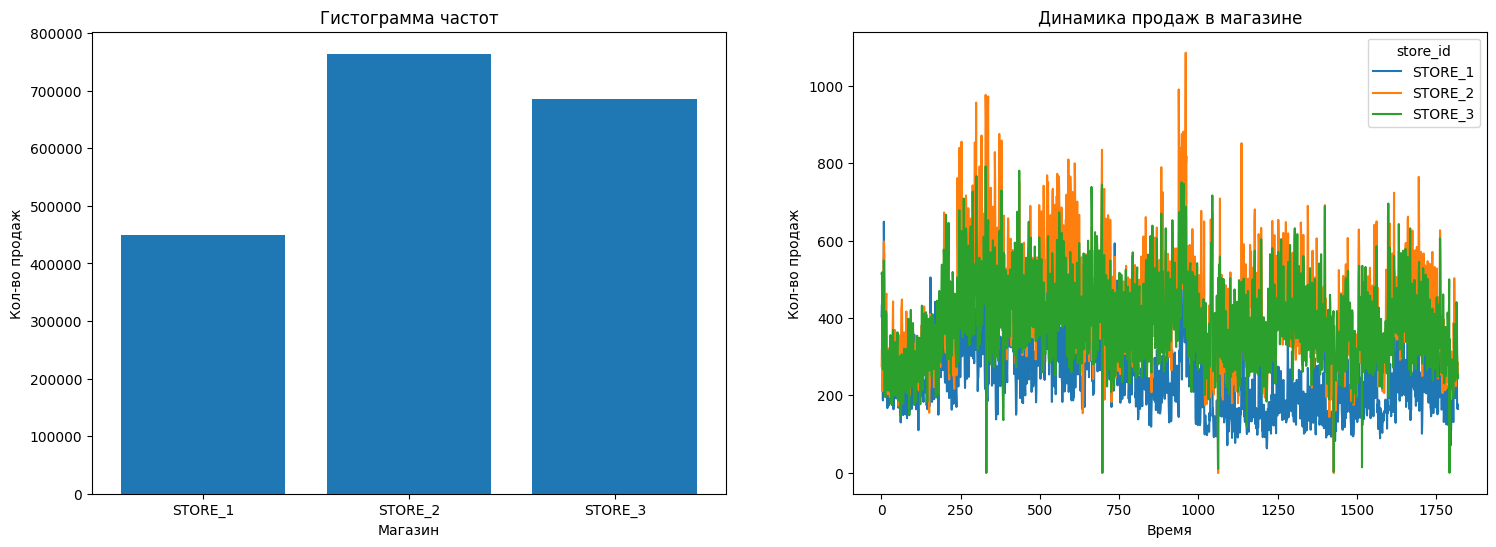

In [69]:
# Динамика продаж в каждом магазине

# Data Preparation
temp_df_histogrm = sales_df.groupby(["store_id"])["cnt"].sum().reset_index()
temp_df_lineplot = sales_df.groupby(["store_id", "date_id"])["cnt"].sum().reset_index()

# Visualisation
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

ax0.set_title("Гистограмма частот")
ax0.bar(temp_df_histogrm.store_id, temp_df_histogrm.cnt)
ax0.set_ylabel("Кол-во продаж")
ax0.set_xlabel("Магазин")

ax1.set_title("Динамика продаж в магазине")
sns.lineplot(data=temp_df_lineplot, x="date_id", y="cnt", hue="store_id")
ax1.set_ylabel("Кол-во продаж")
ax1.set_xlabel("Время")

In [71]:
dates_df.merge(sales_df)

,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,date_id,CASHBACK_STORE_1,CASHBACK_STORE_2,CASHBACK_STORE_3
0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,1,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,2,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,3,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,4,0,1,1
4,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,2016-01-17,11551,Sunday,2,1,2016,NaN,NaN,NaN,NaN,1815,0,0,0
1815,2016-01-18,11551,Monday,3,1,2016,MartinLutherKingDay,National,NaN,NaN,1816,0,0,0
1816,2016-01-19,11551,Tuesday,4,1,2016,NaN,NaN,NaN,NaN,1817,0,0,0
1817,2016-01-20,11551,Wednesday,5,1,2016,NaN,NaN,NaN,NaN,1818,0,0,0


In [74]:
sales_df.groupby("item_id")["date_id"].count()

item_id
STORE_1_064    1819
STORE_1_065    1819
STORE_1_090    1819
STORE_1_252    1819
STORE_1_325    1819
STORE_1_339    1819
STORE_1_376    1819
STORE_1_546    1819
STORE_1_547    1819
STORE_1_555    1819
STORE_1_584    1819
STORE_1_586    1819
STORE_1_587    1819
STORE_1_714    1819
STORE_1_727    1819
STORE_2_043    1819
STORE_2_054    1819
STORE_2_085    1819
STORE_2_090    1819
STORE_2_252    1819
STORE_2_325    1819
STORE_2_376    1819
STORE_2_391    1819
STORE_2_524    1819
STORE_2_555    1819
STORE_2_586    1819
STORE_2_587    1819
STORE_2_681    1819
STORE_2_714    1819
STORE_2_716    1819
STORE_3_012    1819
STORE_3_090    1819
STORE_3_114    1819
STORE_3_169    1819
STORE_3_222    1819
STORE_3_252    1819
STORE_3_357    1819
STORE_3_358    1819
STORE_3_360    1819
STORE_3_389    1819
STORE_3_555    1819
STORE_3_586    1819
STORE_3_587    1819
STORE_3_714    1819
STORE_3_804    1819
Name: date_id, dtype: int64

In [22]:
# date_id - является ключом первого уровня.
sales_df.groupby(["date_id"])["store_id"].count().sort_values(ascending=False)

date_id
1       45
1195    45
1221    45
1220    45
1219    45
        ..
603     45
602     45
601     45
600     45
1819    45
Name: store_id, Length: 1819, dtype: int64

In [25]:
sales_df.groupby(["store_id", "item_id"])["cnt"].sum().sort_values(ascending=False)

store_id  item_id    
STORE_2   STORE_2_090    240269
STORE_3   STORE_3_586    184899
STORE_2   STORE_2_586    128361
STORE_1   STORE_1_090    113668
STORE_3   STORE_3_090    113529
          STORE_3_252    109030
          STORE_3_555     93163
STORE_1   STORE_1_586     83281
STORE_2   STORE_2_252     77740
          STORE_2_587     66947
          STORE_2_555     56372
STORE_1   STORE_1_555     55580
          STORE_1_714     52760
STORE_2   STORE_2_681     51744
          STORE_2_714     49221
STORE_3   STORE_3_587     47244
          STORE_3_714     43531
STORE_1   STORE_1_587     38752
          STORE_1_252     35640
STORE_2   STORE_2_376     34681
STORE_1   STORE_1_547     30059
STORE_3   STORE_3_360     24390
          STORE_3_389     24328
          STORE_3_804     22788
STORE_2   STORE_2_524     21952
STORE_3   STORE_3_012     14463
STORE_2   STORE_2_325     13912
STORE_1   STORE_1_325     12939
STORE_2   STORE_2_085     10186
          STORE_2_054      8631
STORE_1   STORE_1_

In [ ]:
В каждом магазине по 45 товаров.

# 🖇️ Кластеризация

**Основные техники:**

1. **Time Series K-Means** (из пакета `tslearn`);
2. **Dynamic Time Warping (DTW)** — с помощью этой техники можно рассчитывать расстояние между временными рядами и потом кластеризовать их по этому показателю;
3. **Variational Recurrent AutoEncoder (VRAE)** — позволяет получить embedding, кодирующий всю временную последовательность. Соответственно, временные ряды можно кластеризовать с использованием полученного вектора;
4. **Deep Temporal Clustering**.
5. **Time2Vec** — техника работает аналогично VRAE.

**Польза от методов:**
1. Подход с кластеризацией позволяет сделать прогноз не на каждый товар, а на группу товаров. 
2. Объединив товары в группы, мы можем предсказывать общий тренд, а также использовать модели бустинга, чтобы предсказывать отклонение от тренда для каждого товара.

# Forecasting